# ASSIGNMENT 3
- Nama          : Lisa Wahyu Ningsih
- Kode peserta  : PYTN-KS15-007
- Kelas		    : KS-015
- Program	    : Python for Data Science

# Bank 1 (Menggunakan data bank-additional-full)

# Classification 

- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Decision Tree
- Random Forest
- Naive Bayes
- Confusion Matrix 
- Visualization 



## Preprocessing Data
- Import Pustaka
- Data Loading
- Data Cleaning
- EDA (Exploration Data Analysis)

### Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from IPython.display import Math, Latex
from IPython.core.display import Image
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (7,7)})
import statsmodels.api as sm

import random
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
%matplotlib inline

### Data Loading 

In [2]:
df=pd.read_csv('bank_additional_full.csv', sep=';')
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [3]:
print(df.shape)

(41188, 21)


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df["y"].dtype

dtype('O')

In [9]:
df['y_num']=df["y"].replace({"no":0, "yes":1})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [10]:
df["y_num"].dtype

dtype('int64')

untuk menampilkan kolom

In [11]:
df_=df.head(10)
df_.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num'],
      dtype=object)

untuk memeriksa apakah ada kolom yang memiliki nilai null

In [12]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_num             0
dtype: int64

berdasarkan hasil output diatas menunjukkan bahwa tidak ada missing value pada data

In [13]:
print(df.isnull().any())

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
y_num             False
dtype: bool


## Data Cleaning

Tidak perlu melakukan data cleaning karena tidak terdapat missing value

## Exploration Data Analysis (EDA)

In [14]:
print(df.groupby)

<bound method DataFrame.groupby of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [16]:
df.min()

age                     17
job                 admin.
marital           divorced
education         basic.4y
default                 no
housing                 no
loan                    no
contact           cellular
month                  apr
day_of_week            fri
duration                 0
campaign                 1
pdays                    0
previous                 0
poutcome           failure
emp.var.rate          -3.4
cons.price.idx      92.201
cons.conf.idx        -50.8
euribor3m            0.634
nr.employed         4963.6
y                       no
y_num                    0
dtype: object

In [17]:
df.max()

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
y_num                     1
dtype: object

In [18]:
cats=[i for i in df.columns if df[i].dtypes == 'object']
nums=[i for i in df.columns if df[i].dtypes != 'object']

## Logistic Regression

In [19]:
x = df.drop(['y'], axis=1)
y = df['y']

In [20]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [22]:
df_x = pd.get_dummies(x)
df_x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y_num                          41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.25,random_state = 123)

In [25]:
log_model =LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
y_predict = log_model.predict(X_test)

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      9114
         yes       1.00      1.00      1.00      1183

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297



In [27]:
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 1.0


## KNN (K-Nearest Neighbors)

In [28]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred_2 = model_knn.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      9114
         yes       0.60      0.50      0.54      1183

    accuracy                           0.90     10297
   macro avg       0.77      0.73      0.74     10297
weighted avg       0.90      0.90      0.90     10297



In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred_2))

Accuracy: 0.9036612605613286


## SVM (Support Vector Machine)

In [31]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_predict_3 = model_svm.predict(X_test)

In [32]:
print(classification_report(y_test, y_predict_3))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      9114
         yes       0.66      0.22      0.33      1183

    accuracy                           0.90     10297
   macro avg       0.79      0.60      0.64     10297
weighted avg       0.88      0.90      0.87     10297



In [33]:
print("Accuracy:", accuracy_score(y_test, y_predict_3))

Accuracy: 0.8977372050111683


## Decission tree

In [34]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_predict_4 = model_dt.predict(X_test)

In [35]:
print(classification_report(y_test, y_predict_4))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      9114
         yes       1.00      1.00      1.00      1183

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297



In [36]:
print("Accuracy:", accuracy_score(y_test, y_predict_4))

Accuracy: 1.0


## Random Forest

In [37]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_predict_5 = model_rfc.predict(X_test)

In [38]:
print(classification_report(y_test, y_predict_5))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      9114
         yes       1.00      1.00      1.00      1183

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297



In [39]:
print("Accuracy:", accuracy_score(y_test, y_predict_5))

Accuracy: 1.0


## Naive Bayes

In [40]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_predict_6 = model_nb.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict_6))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      9114
         yes       1.00      1.00      1.00      1183

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297



In [42]:
print("Accuracy:", accuracy_score(y_test, y_predict_6))

Accuracy: 1.0


Berdasarkan output diatas, kita akan mengambil model logistik regresi yang akan digunakan untuk Confussion Matrix:

In [43]:
y_score = log_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=log_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=log_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

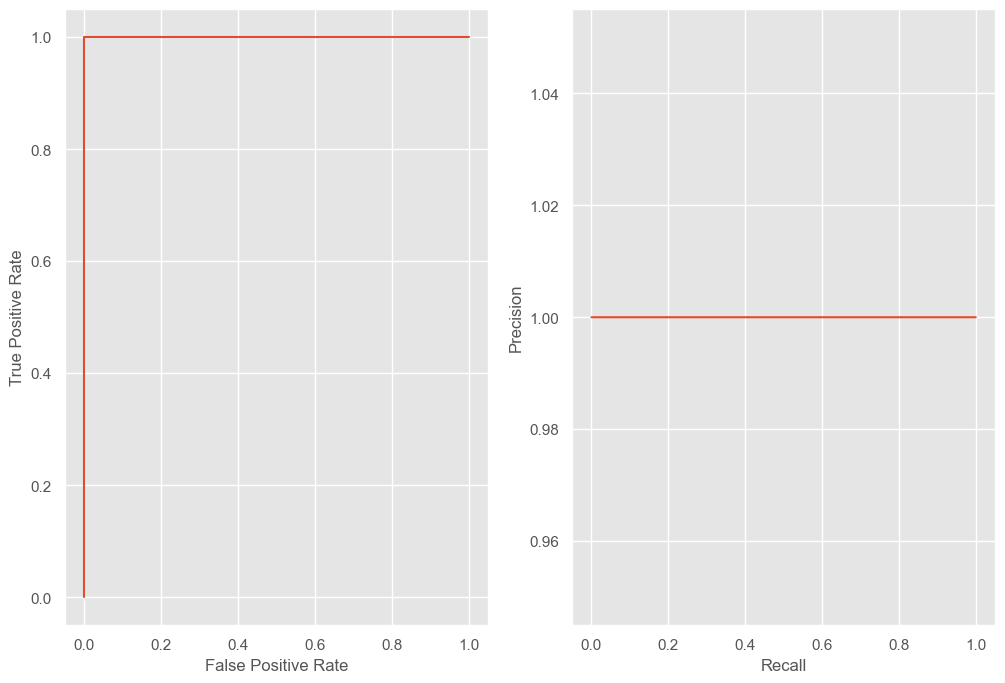

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

## Visualization

#### Confussion Matrix

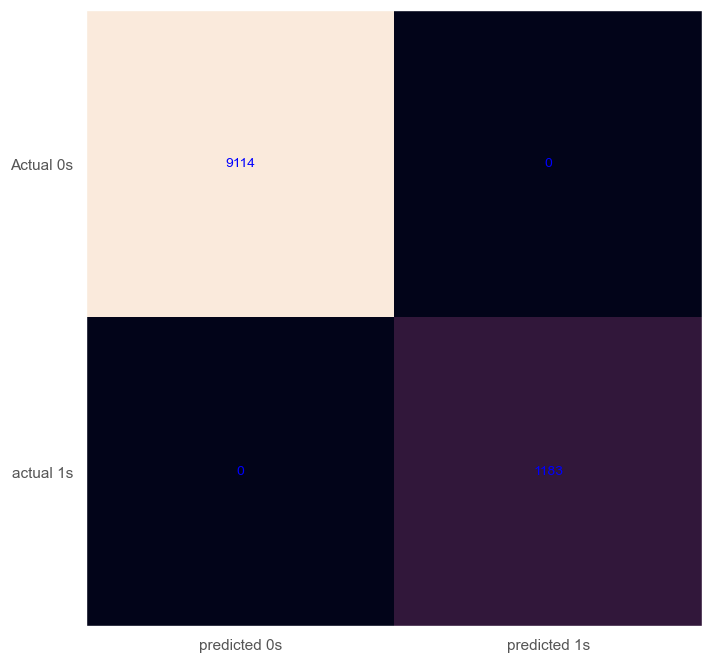

In [45]:
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
plt.show()

Setelah dilakukan Confusion Matrix, didapat : 
- True Negatives 9114
- False Negatives 0
- False Positives 0
- True Positives 1183

#### pairplot

In [46]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [47]:
df_final = df[df['marital'] != 'unknown']
df_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [48]:
df_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


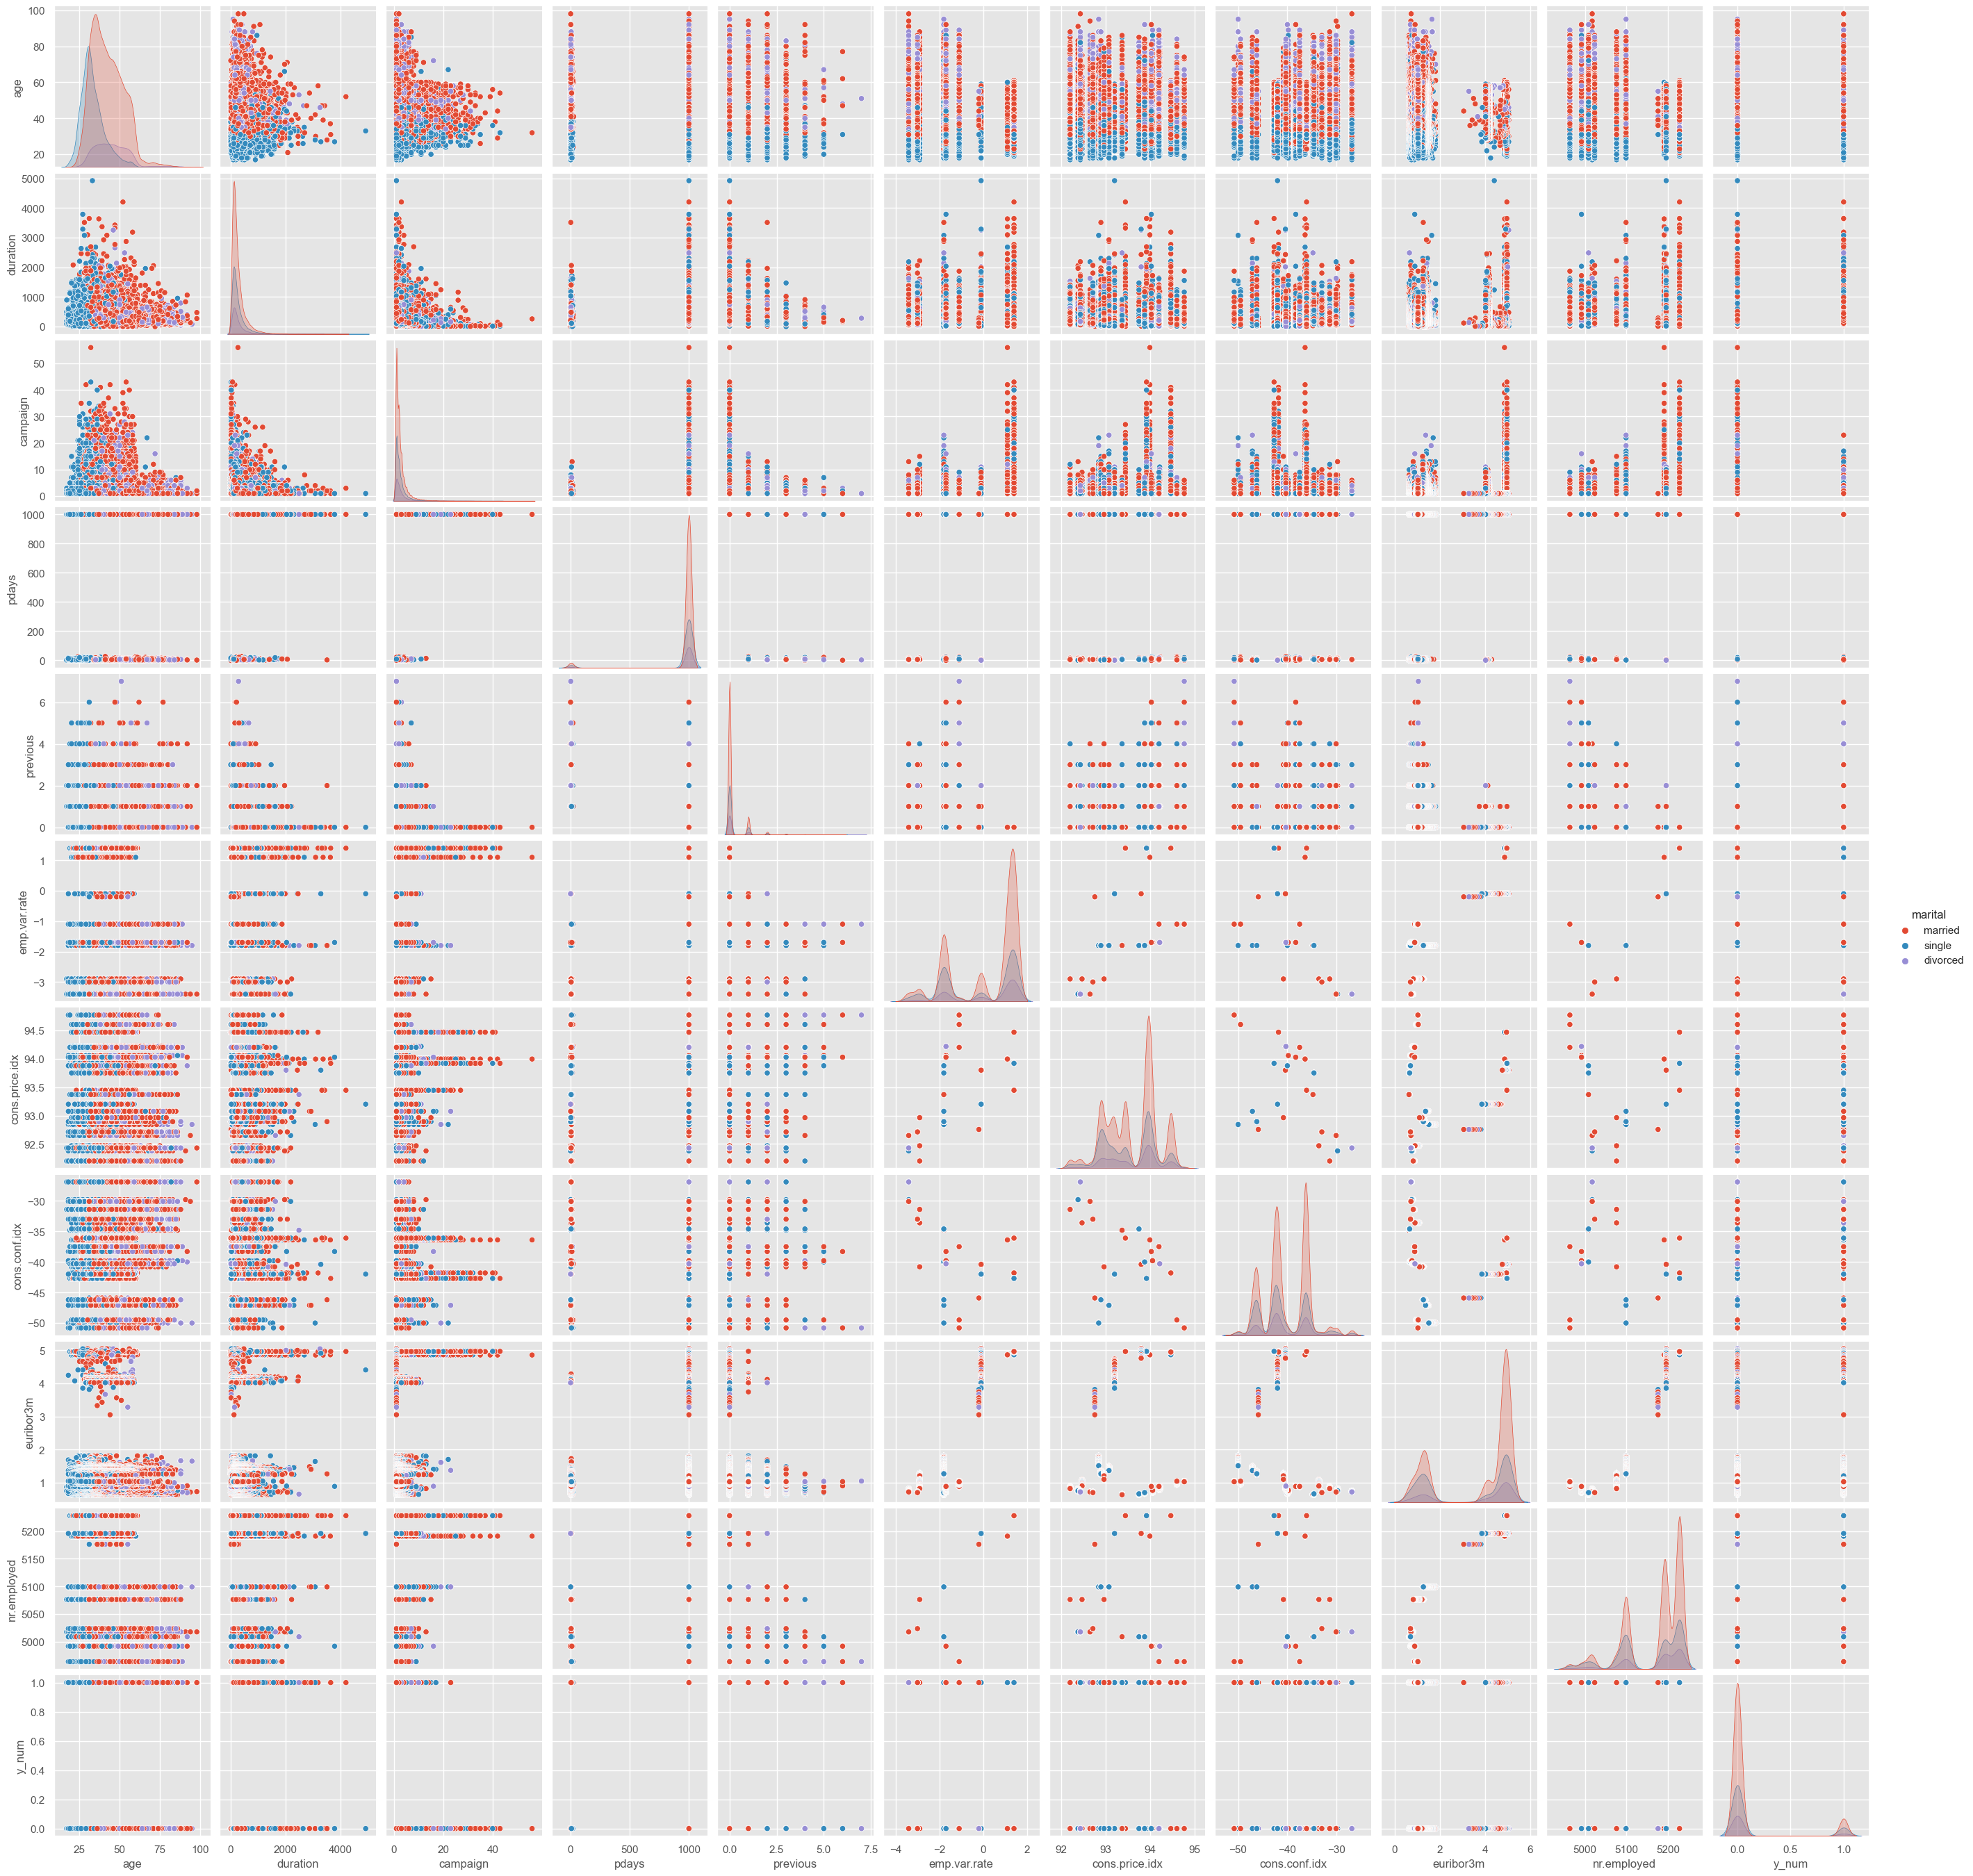

In [49]:
sns.pairplot(df_final, hue='marital', size=2.5)

#### Histogram

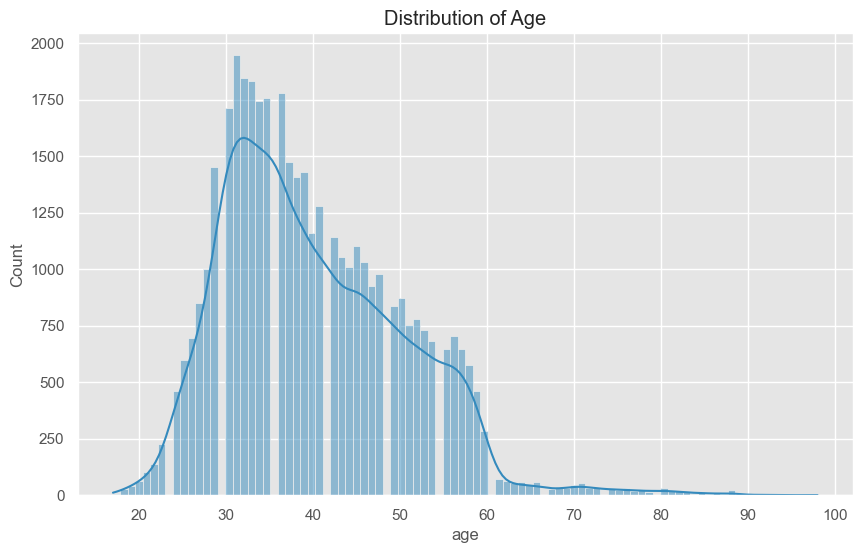

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title("Distribution of Age")
plt.show()

##### Interpretasi Output Histogram:
Berdasarkan output diatas, dapat dilihat bahwa kelompok umur antara 30-40 memiliki frekuensi tertinggi yang berlangganan deposito diantara kelompok umur lainnya

#### Scatter Plot

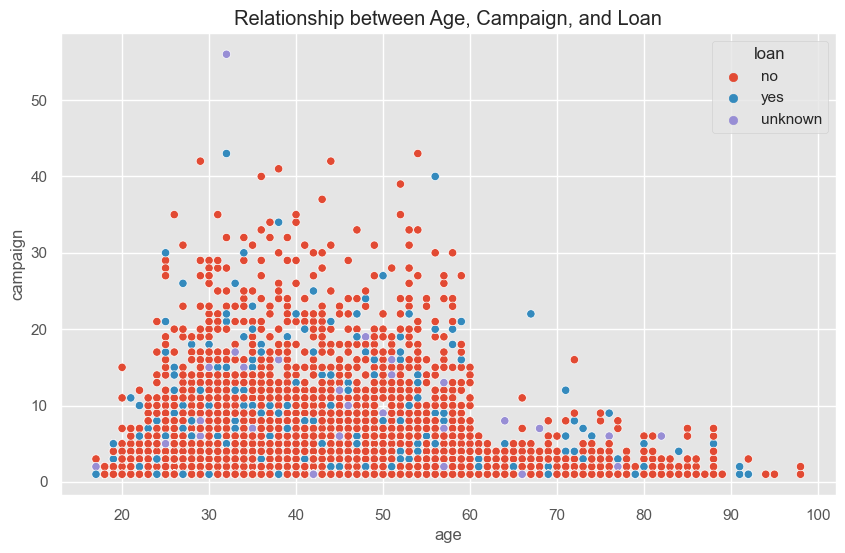

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="campaign", hue="loan")
plt.title("Relationship between Age, Campaign, and Loan")
plt.show()

##### Interpretasi Output Scatter Plot:
Berdasarkan output diatas, dapat dilihat bahwa plot menyebar yang artinya relationship between age, loan, and campaign memiliki hubungan atau korelasi yang sangat rendah atau bahkan tidak ada hubungan

#### Pie Chart

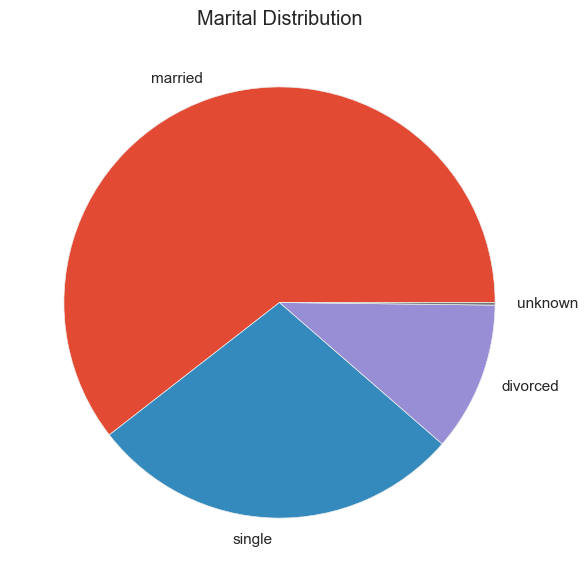

In [52]:
married_ = df['marital'].value_counts()
plt.pie(married_, labels=married_.index)
plt.title('Marital Distribution')
plt.show()

##### Interpretasi Output Pie Chart:
Berdasarkan output diatas, dapat dilihat bahwa angka status pernikahan terbanyak yang berlangganan deposito adalah menikah, disusul dengan status single, cerai dan lainnya

#### Heatmap

<AxesSubplot:>

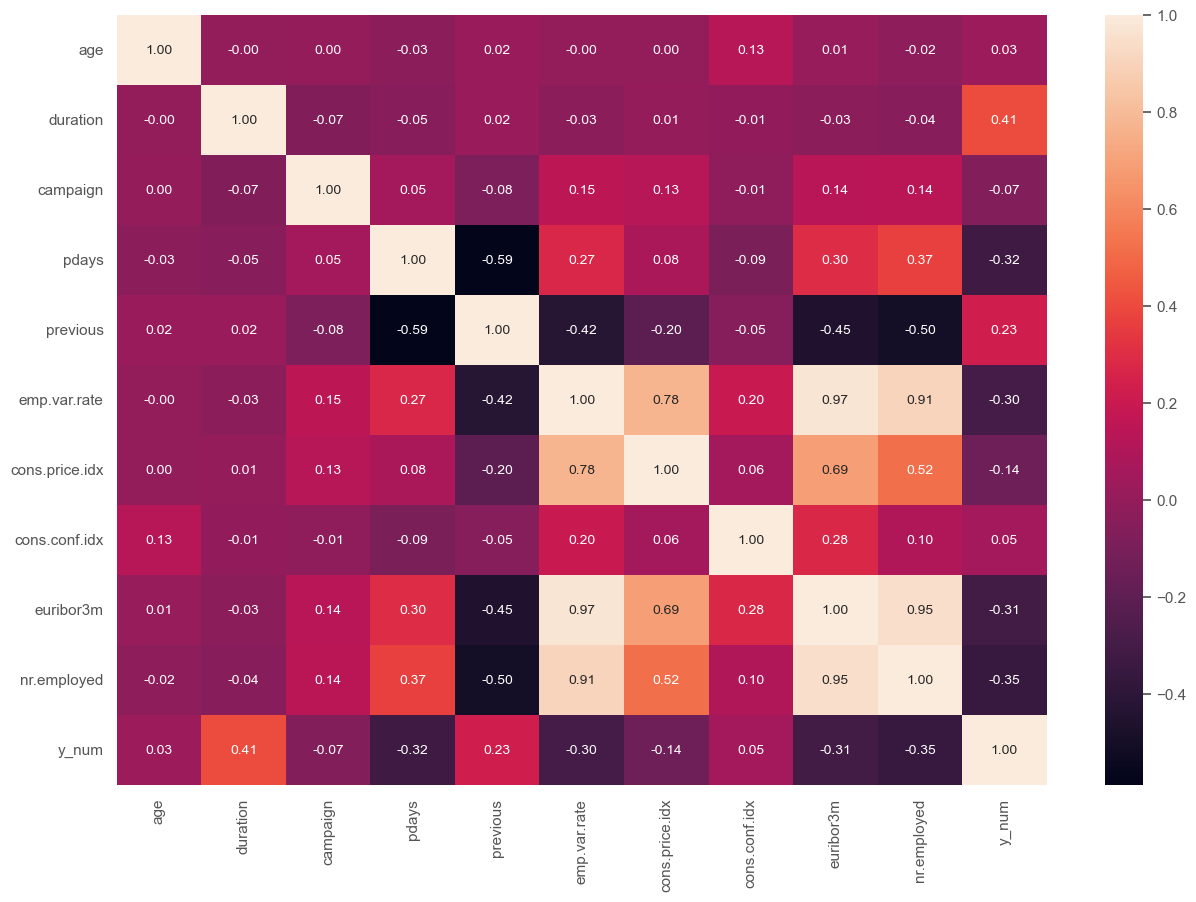

In [53]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

##### Interpretasi Output Heatmap:

Berdasarkan output diatas, sebagian data memiliki korelasi yang kuat(>0.9), sedangkan yang lainnya memiliki korelasi yang sangat lemah (<0.2). tingkat korelasi juga bisa dilihat dari warna yang tertera, semakin terang warnanya maka semakin kuat korelasinya.